# Introduction to Altair

**Note: This is largely based on the amazing Visualisation Cirriculum by University of Washington folks -- https://github.com/uwdata/visualization-curriculum**

[Altair](https://altair-viz.github.io/) is a declarative statistical visualization library for Python. Altair offers a powerful and concise visualization grammar for quickly building a wide range of statistical graphics.

By *declarative*, we mean that you can provide a high-level specification of *what* you want the visualization to include, in terms of *data*, *graphical marks*, and *encoding channels*, rather than having to specify *how* to implement the visualization in terms of for-loops, low-level drawing commands, *etc*. The key idea is that you declare links between data fields and visual encoding channels, such as the x-axis, y-axis, color, *etc*. The rest of the plot details are handled automatically. Building on this declarative plotting idea, a surprising range of simple to sophisticated visualizations can be created using a concise grammar.

Altair is based on [Vega-Lite](https://vega.github.io/vega-lite/), a high-level grammar of interactive graphics. Altair provides a friendly Python [API (Application Programming Interface)](https://en.wikipedia.org/wiki/Application_programming_interface) that generates Vega-Lite specifications in [JSON (JavaScript Object Notation)](https://en.wikipedia.org/wiki/JSON) format. Environments such as Jupyter Notebooks, JupyterLab, and Colab can then take this specification and render it directly in the web browser. To learn more about the motivation and basic concepts behind Altair and Vega-Lite, watch the [Vega-Lite presentation video from OpenVisConf 2017](https://www.youtube.com/watch?v=9uaHRWj04D4).

This notebook will guide you through the basic process of creating visualizations in Altair. First, you will need to make sure you have the Altair package and its dependencies installed (for more, see the [Altair installation documentation](https://altair-viz.github.io/getting_started/installation.html)), or you are using a notebook environment that includes the dependencies pre-installed.


# Part-1: Hello Altair!

## Imports

To start, we must import the necessary libraries: Pandas for data frames and Altair for visualization.

In [ ]:
import pandas as pd
import altair as alt

## Data

Data in Altair is built around the Pandas data frame, which consists of a set of named data *columns*. We will also regularly refer to data columns as data *fields*.

When using Altair, datasets are commonly provided as data frames. Alternatively, Altair can also accept a URL to load a network-accessible dataset. As we will see, the named columns of the data frame are an essential piece of plotting with Altair.

We can also use datasets from the [vega-datasets](https://github.com/vega/vega-datasets) repository when practicing. Some of these datasets are directly available as Pandas data frames:

In [ ]:
from vega_datasets import data  # import vega_datasets
cars = data.cars()              # load cars data as a Pandas data frame
cars.head()                     # display the first five rows

### Weather Data

Statistical visualization in Altair begins with ["tidy"](http://vita.had.co.nz/papers/tidy-data.html) data frames. Here, we'll start by creating a simple data frame (`df`) containing the average precipitation (`precip`) for a given `city` and `month` :

In [ ]:
df = pd.DataFrame({
    'city': ['Seattle', 'Seattle', 'Seattle', 'New York', 'New York', 'New York', 'Chicago', 'Chicago', 'Chicago'],
    'month': ['Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec'],
    'precip': [2.68, 0.87, 5.31, 3.94, 4.13, 3.58, 3.62, 3.98, 2.56]
})

df

## The Chart Object

The fundamental object in Altair is the `Chart`, which takes a data frame as a single argument:

In [ ]:
chart = alt.Chart(df)

So far, we have defined the `Chart` object and passed it the simple data frame we generated above. We have not yet told the chart to *do* anything with the data.

## Marks and Encodings

With a chart object in hand, we can now specify how we would like the data to be visualized. We first indicate what kind of graphical *mark* (geometric shape) we want to use to represent the data. We can set the `mark` attribute of the chart object using the the `Chart.mark_*` methods.

For example, we can show the data as a point using `Chart.mark_point()`:

In [ ]:
alt.Chart(df).mark_point()

Here the rendering consists of one point per row in the dataset, all plotted on top of each other, since we have not yet specified positions for these points.

To visually separate the points, we can map various *encoding channels*, or *channels* for short, to fields in the dataset. For example, we could *encode* the field `city` of the data using the `y` channel, which represents the y-axis position of the points. To specify this, use the `encode` method:


In [ ]:
alt.Chart(df).mark_point().encode(
  y='city',
)

The `encode()` method builds a key-value mapping between encoding channels (such as `x`, `y`, `color`, `shape`, `size`, *etc.*) to fields in the dataset, accessed by field name. For Pandas data frames, Altair automatically determines an appropriate data type for the mapped column, which in this case is the *nominal* type, indicating unordered, categorical values.

Though we've now separated the data by one attribute, we still have multiple points overlapping within each category. Let's further separate these by adding an `x` encoding channel, mapped to the `'precip'` field:

In [ ]:
alt.Chart(df).mark_point().encode(
    x='precip',
    y='city'
)

_Seattle exhibits both the least-rainiest and most-rainiest months!_

The data type of the `'precip'` field is again automatically inferred by Altair, and this time is treated as a *quantitative* type (that is, a real-valued number). We see that grid lines and appropriate axis titles are automatically added as well.

Above we have specified key-value pairs using keyword arguments (`x='precip'`). In addition, Altair provides construction methods for encoding definitions, using the syntax `alt.X('precip')`. This alternative is useful for providing more parameters to an encoding, as we will see later in this notebook.



In [ ]:
alt.Chart(df).mark_point().encode(
    alt.X('precip'),
    alt.Y('city')
)

The two styles of specifying encodings can be interleaved: `x='precip', alt.Y('city')` is also a valid input to the `encode` function.

In the examples above, the data type for each field is inferred automatically based on its type within the Pandas data frame. We can also explicitly indicate the data type to Altair by annotating the field name:

- `'b:N'` indicates a *nominal* type (unordered, categorical data),
- `'b:O'` indicates an *ordinal* type (rank-ordered data),
- `'b:Q'` indicates a *quantitative* type (numerical data with meaningful magnitudes), and
- `'b:T'` indicates a *temporal* type (date/time data)

For example, `alt.X('precip:N')`.

Explicit annotation of data types is necessary when data is loaded from an external URL directly by Vega-Lite (skipping Pandas entirely), or when we wish to use a type that differs from the type that was automatically inferred.


<img src="tools-hammer.svg" width="30">  **GIVE IT A TRY!** 

What do you think will happen to our chart above if we treat `precip` as a nominal or ordinal variable, rather than a quantitative variable? _Modify the code above and find out!_


## Data Transformation: Aggregation

To allow for more flexibility in how data are visualized, Altair has a built-in syntax for *aggregation* of data. For example, we can compute the average of all values by specifying an aggregation function along with the field name:

In [ ]:
alt.Chart(df).mark_point().encode(
    x='average(precip)',
    y='city'
)

Now within each x-axis category, we see a single point reflecting the *average* of the values within that category.

_Does Seattle really have the lowest average precipitation of these cities? (It does!) Still, how might this plot mislead? Which months are included? What counts as precipitation?_

Altair supports a variety of aggregation functions, including `count`, `min` (minimum), `max` (maximum), `average`, `median`, and `stdev` (standard deviation). In a later notebook, we will take a tour of data transformations, including aggregation, sorting, filtering, and creation of new derived fields using calculation formulas.

## Changing the Mark Type

Let's say we want to represent our aggregated values using rectangular bars rather than circular points. We can do this by replacing `Chart.mark_point` with `Chart.mark_bar`:

In [ ]:
alt.Chart(df).mark_bar().encode(
    x='average(precip)',
    y='city'
)

Because the nominal field `a` is mapped to the `y`-axis, the result is a horizontal bar chart. To get a vertical bar chart, we can simply swap the `x` and `y` keywords:

In [ ]:
alt.Chart(df).mark_bar().encode(
    x='city',
    y='average(precip)'
)

## Customizing a Visualization

By default Altair / Vega-Lite make some choices about properties of the visualization, but these can be changed using methods to customize the look of the visualization. For example, we can specify the axis titles using the `axis` attribute of channel classes, we can modify scale properties using the `scale` attribute, and we can specify the color of the marking by setting the `color` keyword of the `Chart.mark_*` methods to any valid [CSS color string](https://developer.mozilla.org/en-US/docs/Web/CSS/color_value):

In [ ]:
alt.Chart(df).mark_point(color='firebrick').encode(
  alt.X('precip', scale=alt.Scale(type='log'), axis=alt.Axis(title='Log-Scaled Values')),
  alt.Y('city', axis=alt.Axis(title='Category')),
)

A subsequent module will explore the various options available for scales, axes, and legends to create customized charts.

# Part-2: Data Types, Graphical Marks, and Visual Encoding Channels

A visualization represents data using a collection of _graphical marks_ (bars, lines, points, etc.). The attributes of a mark &mdash; such as its position, shape, size, or color &mdash; serve as _channels_ through which we can encode underlying data values.

## Global Development Data


We will be visualizing global health and population data for a number of countries, over the time period of 1955 to 2005. The data was collected by the [Gapminder Foundation](https://www.gapminder.org/) and shared in [Hans Rosling's popular TED talk](https://www.youtube.com/watch?v=hVimVzgtD6w). If you haven't seen the talk, we encourage you to watch it first!

Let's first load the dataset from the [vega-datasets](https://github.com/vega/vega-datasets) collection into a Pandas data frame.

In [ ]:
from vega_datasets import data as vega_data
data = vega_data.gapminder()

In [ ]:
data.head(5)

For each `country` and `year` (in 5-year intervals), we have measures of fertility in terms of the number of children per woman (`fertility`), life expectancy in years (`life_expect`), and total population (`pop`).

We also see a `cluster` field with an integer code. What might this represent? We'll try and solve this mystery as we visualize the data!

Let's also create a smaller data frame, filtered down to values for the year 2000 only:

In [ ]:
data2000 = data.loc[data['year'] == 2000]

In [ ]:
data2000.head(5)

### Data Types:
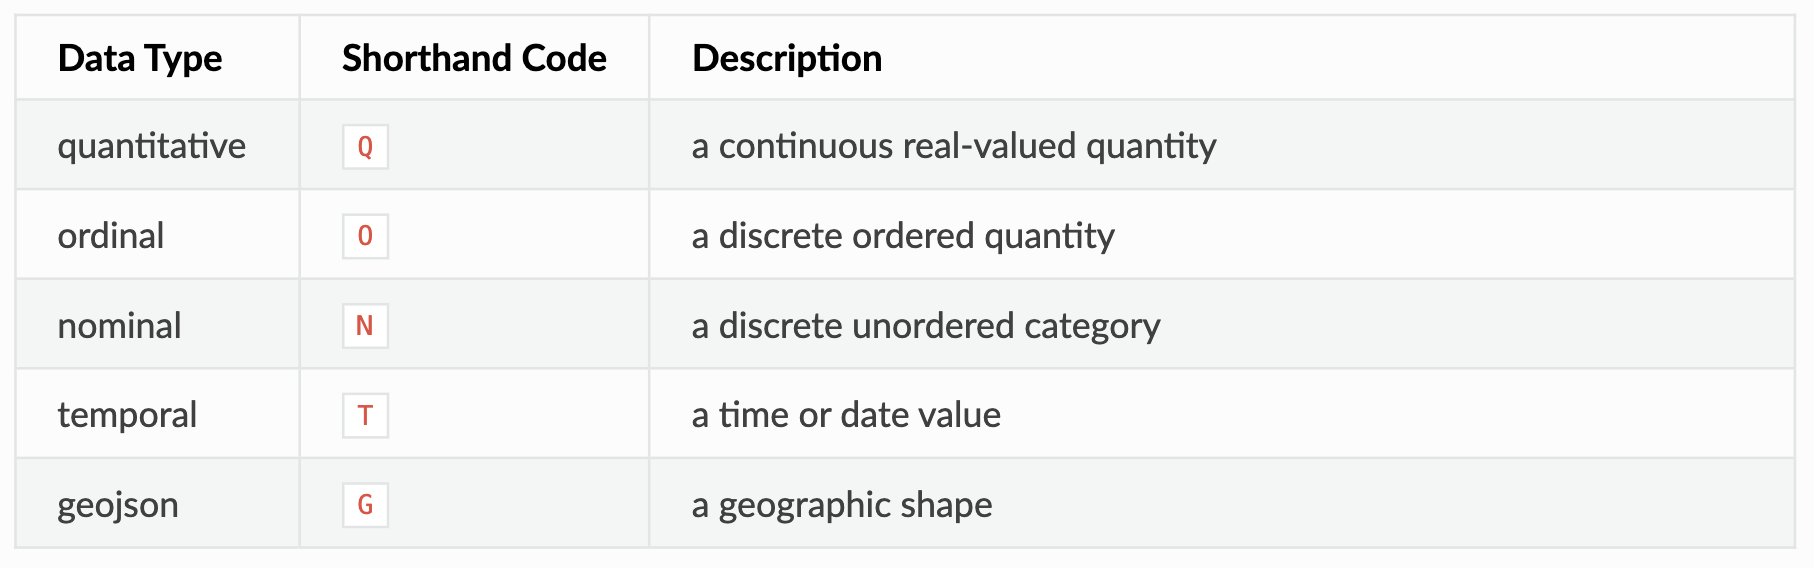


## Encoding Channels

At the heart of Altair is the use of *encodings* that bind data fields (with a given data type) to available encoding *channels* of a chosen *mark* type. In this notebook we'll examine the following encoding channels:

- `x`: Horizontal (x-axis) position of the mark.
- `y`: Vertical (y-axis) position of the mark.
- `size`: Size of the mark. May correspond to area or length, depending on the mark type.
- `color`: Mark color, specified as a [legal CSS color](https://developer.mozilla.org/en-US/docs/Web/CSS/color_value).
- `opacity`: Mark opacity, ranging from 0 (fully transparent) to 1 (fully opaque).
- `shape`: Plotting symbol shape for `point` marks.
- `tooltip`: Tooltip text to display upon mouse hover over the mark.
- `order`: Mark ordering, determines line/area point order and drawing order.
- `column`: Facet the data into horizontally-aligned subplots.
- `row`: Facet the data into vertically-aligned subplots.

For a complete list of available channels, see the [Altair encoding documentation](https://altair-viz.github.io/user_guide/encoding.html).

Let's try some of these encoding channels and see how we can generate more sophisticated charts.

We've already seen the basic use of **X** and **Y**

In [ ]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:O')
)

_What happens to the chart above if you swap the `O` and `Q` field types?_

If we instead add the `life_expect` field as a quantitative (`Q`) variable, the result is a scatter plot with linear scales for both axes:

In [ ]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q')
)

Let's go through the list of channels and see what else we can encode on the plot. How about size?

In [ ]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q')
)

In some cases we might be unsatisfied with the default size range. To provide a customized span of sizes, set the `range` parameter of the `scale` attribute to an array indicating the smallest and largest sizes. Here we update the size encoding to range from 0 pixels (for zero values) to 1,000 pixels (for the maximum value in the scale domain):

In [ ]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000]))
)

<img src="tools-hammer.svg" width="30">  **GIVE IT A TRY!** 

Let's also try with color. Can you modify the below and try to get some colour in? Let's think of a good variable to use. 

The code to use will look like:

`alt.Color('XXXX:N')` or `alt.Color('XXXX:Q')`

notice that depending on the variable, we can choose to have a nominal 'N' or quantitative 'Q' variable. What do you think this would change, want to try?

In [ ]:
## Can you modify this now?

alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000]))
)

There are many channels to play with in Altair and curate a visualisation that fits with what you want to achieve. The code below gets several bits together in a single plot:

In [ ]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q', title='Life Expectancy'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending')
).properties(title="My interesting title",width=500,height=400)

Also notice the `properties()` part at the end of the specification which enables us to play with a range of chart-level configurations, such as the title. But these are for you to explore.

## Graphical Marks

Our exploration of encoding channels above exclusively uses `point` marks to visualize the data. However, the `point` mark type is only one of the many geometric shapes that can be used to visually represent data. Altair includes a number of built-in mark types, including:

- `mark_area()` - Filled areas defined by a top-line and a baseline.
- `mark_bar()` -	Rectangular bars.
- `mark_circle()`	- Scatter plot points as filled circles.
- `mark_line()` - Connected line segments.
- `mark_point()` - Scatter plot points with configurable shapes.
- `mark_rect()` - Filled rectangles, useful for heatmaps.
- `mark_rule()` - Vertical or horizontal lines spanning the axis.
- `mark_square()` - Scatter plot points as filled squares.
- `mark_text()` - Scatter plot points represented by text.
- `mark_tick()` - Vertical or horizontal tick marks.	

For a complete list, and links to examples, see the [Altair marks documentation](https://altair-viz.github.io/user_guide/marks.html). Next, we will step through a number of the most commonly used mark types for statistical graphics.

### Point Marks

The `point` mark type conveys specific points, as in *scatter plots* and *dot plots*. In addition to `x` and `y` encoding channels (to specify 2D point positions), point marks can use `color`, `size`, and `shape` encodings to convey additional data fields.

Below is a dot plot of `fertility`, with the `cluster` field redundantly encoded using both the `y` and `shape` channels. 



In [ ]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

In addition to encoding channels, marks can be stylized by providing values to the `mark_*()` methods.

For example: point marks are drawn with stroked outlines by default, but can be specified to use `filled` shapes instead. Similarly, you can set a default `size` to set the total pixel area of the point mark.


In [ ]:
alt.Chart(data2000).mark_point(filled=True, size=100).encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

Try the same chart with `mark_square` or `mark_tick()`. These are all options for you to decide on when desining a visualisation.

In [ ]:
alt.Chart(data2000).mark_square(size=100).encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

# Part-3: A few further topics to explore

## Multiple Views

As we've seen above, the Altair `Chart` object represents a plot with a single mark type. What about more complicated diagrams, involving multiple charts or layers? Using a set of *view composition* operators, Altair can take multiple chart definitions and combine them to create more complex views.

As a starting point, let's plot the cars dataset in a line chart showing the average mileage by the year of manufacture:

In [ ]:
# we've already loaded this but just in case
from vega_datasets import data  # import vega_datasets
cars = data.cars()              # load cars data as a Pandas data frame
cars.head()                     # display the first five rows

In [ ]:
alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

To augment this plot, we might like to add `circle` marks for each averaged data point. (The `circle` mark is just a convenient shorthand for `point` marks that used filled circles.)

We can start by defining each chart separately: first a line plot, then a scatter plot. We can then use the `layer` operator to combine the two into a layered chart. Here we use the shorthand `+` (plus) operator to invoke layering:

In [ ]:
line = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

point = alt.Chart(cars).mark_circle().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

line + point

We can also create this chart by *reusing* and *modifying* a previous chart definition! Rather than completely re-write a chart, we can start with the line chart, then invoke the `mark_point` method to generate a new chart definition with a different mark type:

In [ ]:
mpg = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

mpg + mpg.mark_circle()

<em>(The need to place points on lines is so common, the `line` mark also includes a shorthand to generate a new layer for you. Trying adding the argument `point=True` to the `mark_line` method!)</em>

Now, what if we'd like to see this chart alongside other plots, such as the average horsepower over time?

We can use *concatenation* operators to place multiple charts side-by-side, either vertically or horizontally. Here, we'll use the `|` (pipe) operator to perform horizontal concatenation of two charts:

In [ ]:
hp = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Horsepower)')
)

(mpg + mpg.mark_circle()) | (hp + hp.mark_circle())

_We can see that, in this dataset, over the 1970s and early '80s the average fuel efficiency improved while the average horsepower decreased._

There is also the `facet` operator for splitting data into sub-plots and the `repeat` operator to concisely generate concatenated charts from a template.

### Other ways to generate multiple views, aka "Small Multiples"
We can also use `rows` and `columns` to generate what we normally refer to as small muliples. Let's check this example with the GapMiinder data:


In [ ]:

alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000]),
             legend=alt.Legend(orient='bottom', titleOrient='left')),
    alt.Color('cluster:N', legend=None),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending'),
    alt.Column('cluster:N')
).properties(width=135, height=135)

## Interactivity

In addition to basic plotting and view composition, one of Altair and Vega-Lite's most exciting features is its support for interaction.

To create a simple interactive plot that supports panning and zooming, we can invoke the `interactive()` method of the `Chart` object. In the chart below, click and drag to *pan* or use the scroll wheel to *zoom*:

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

To provide more details upon mouse hover, we can use the `tooltip` encoding channel:

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin'] # show Name and Origin in a tooltip
).interactive()

For more complex interactions, such as linked charts and cross-filtering, Altair provides a *selection* abstraction for defining interactive selections and then binding them to components of a chart. We will cover this is in detail in a later notebook.

Below is a more complex example. The upper histogram shows the count of cars per year and  uses an interactive selection to modify the opacity of points in the lower scatter plot, which shows horsepower versus mileage.

_Drag out an interval in the upper chart and see how it affects the points in the lower chart. As you examine the code, **don't worry if parts don't make sense yet!** This is an aspirational example but just to demonstrate what is possible.

In [ ]:
# create an interval selection over an x-axis encoding
brush = alt.selection_interval(encodings=['x'])

# determine opacity based on brush
opacity = alt.condition(brush, alt.value(0.9), alt.value(0.1))

# an overview histogram of cars per year
# add the interval brush to select cars over time
overview = alt.Chart(cars).mark_bar().encode(
    alt.X('Year:O', timeUnit='year', # extract year unit, treat as ordinal
      axis=alt.Axis(title=None, labelAngle=0) # no title, no label angle
    ),
    alt.Y('count()', title=None), # counts, no axis title
    opacity=opacity
).add_selection(
    brush      # add interval brush selection to the chart
).properties(
    width=400, # set the chart width to 400 pixels
    height=50  # set the chart height to 50 pixels
)

# a detail scatterplot of horsepower vs. mileage
# modulate point opacity based on the brush selection
detail = alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon'),
    # set opacity based on brush selection
    opacity=opacity
).properties(width=400) # set chart width to match the first chart

# vertically concatenate (vconcat) charts using the '&' operator
overview & detail

## Publishing a Visualization

Once you have visualized your data, perhaps you would like to publish it somewhere on the web. This can be done straightforwardly using the [vega-embed JavaScript package](https://github.com/vega/vega-embed). A simple example of a stand-alone HTML document can be generated for any chart using the `Chart.save` method:

```python
chart = alt.Chart(df).mark_bar().encode(
    x='average(precip)',
    y='city',
)
chart.save('chart.html')
```


The basic HTML template produces output that looks like this, where the JSON specification for your plot produced by `Chart.to_json` should be stored in the `spec` JavaScript variable:

```html
<!DOCTYPE html>
<html>
  <head>
    <script src="https://cdn.jsdelivr.net/npm/vega@5"></script>
    <script src="https://cdn.jsdelivr.net/npm/vega-lite@4"></script>
    <script src="https://cdn.jsdelivr.net/npm/vega-embed@6"></script>
  </head>
  <body>
  <div id="vis"></div>
  <script>
    (function(vegaEmbed) {
      var spec = {}; /* JSON output for your chart's specification */
      var embedOpt = {"mode": "vega-lite"}; /* Options for the embedding */

      function showError(el, error){
          el.innerHTML = ('<div style="color:red;">'
                          + '<p>JavaScript Error: ' + error.message + '</p>'
                          + "<p>This usually means there's a typo in your chart specification. "
                          + "See the javascript console for the full traceback.</p>"
                          + '</div>');
          throw error;
      }
      const el = document.getElementById('vis');
      vegaEmbed("#vis", spec, embedOpt)
        .catch(error => showError(el, error));
    })(vegaEmbed);
  </script>
</body>
</html>
 ```

The `Chart.save` method provides a convenient way to save such HTML output to file. For more information on embedding Altair/Vega-Lite, see the [documentation of the vega-embed project](https://github.com/vega/vega-embed).


<img src="tools-hammer.svg" width="60">  **GIVE IT A TRY!** 


Would you like to generate an Altair plot from scratch? For this we can work with another pre-loaded dataset on health, income and population statistics associated with countries. 

Think about the message you want to deliver, which enconding and layout could deliver a clearer/stronger message? How to use the titles more effectively?

In [ ]:
from vega_datasets import data as vega_data

incomeHealthData = vega_data.gapminder_health_income()

In [ ]:
# You go ahead and create your plot here, enjoy!